In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import math
plt.style.use('_mpl-gallery')
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
shengwut=pd.read_excel('shengwu.xlsx',sheet_name='2016-2020物种数据库')
weather=pd.read_excel('weather.xlsx')
zhengfa=pd.read_excel('土壤蒸发量2012—2022年各月份.xls')
zhibei=pd.read_excel('植被指数-NDVI2012-2022年.xls')
people=pd.read_excel('people.xlsx')

## 气象因素分析

Text(0.5, 0, '年份-月份（每月）')

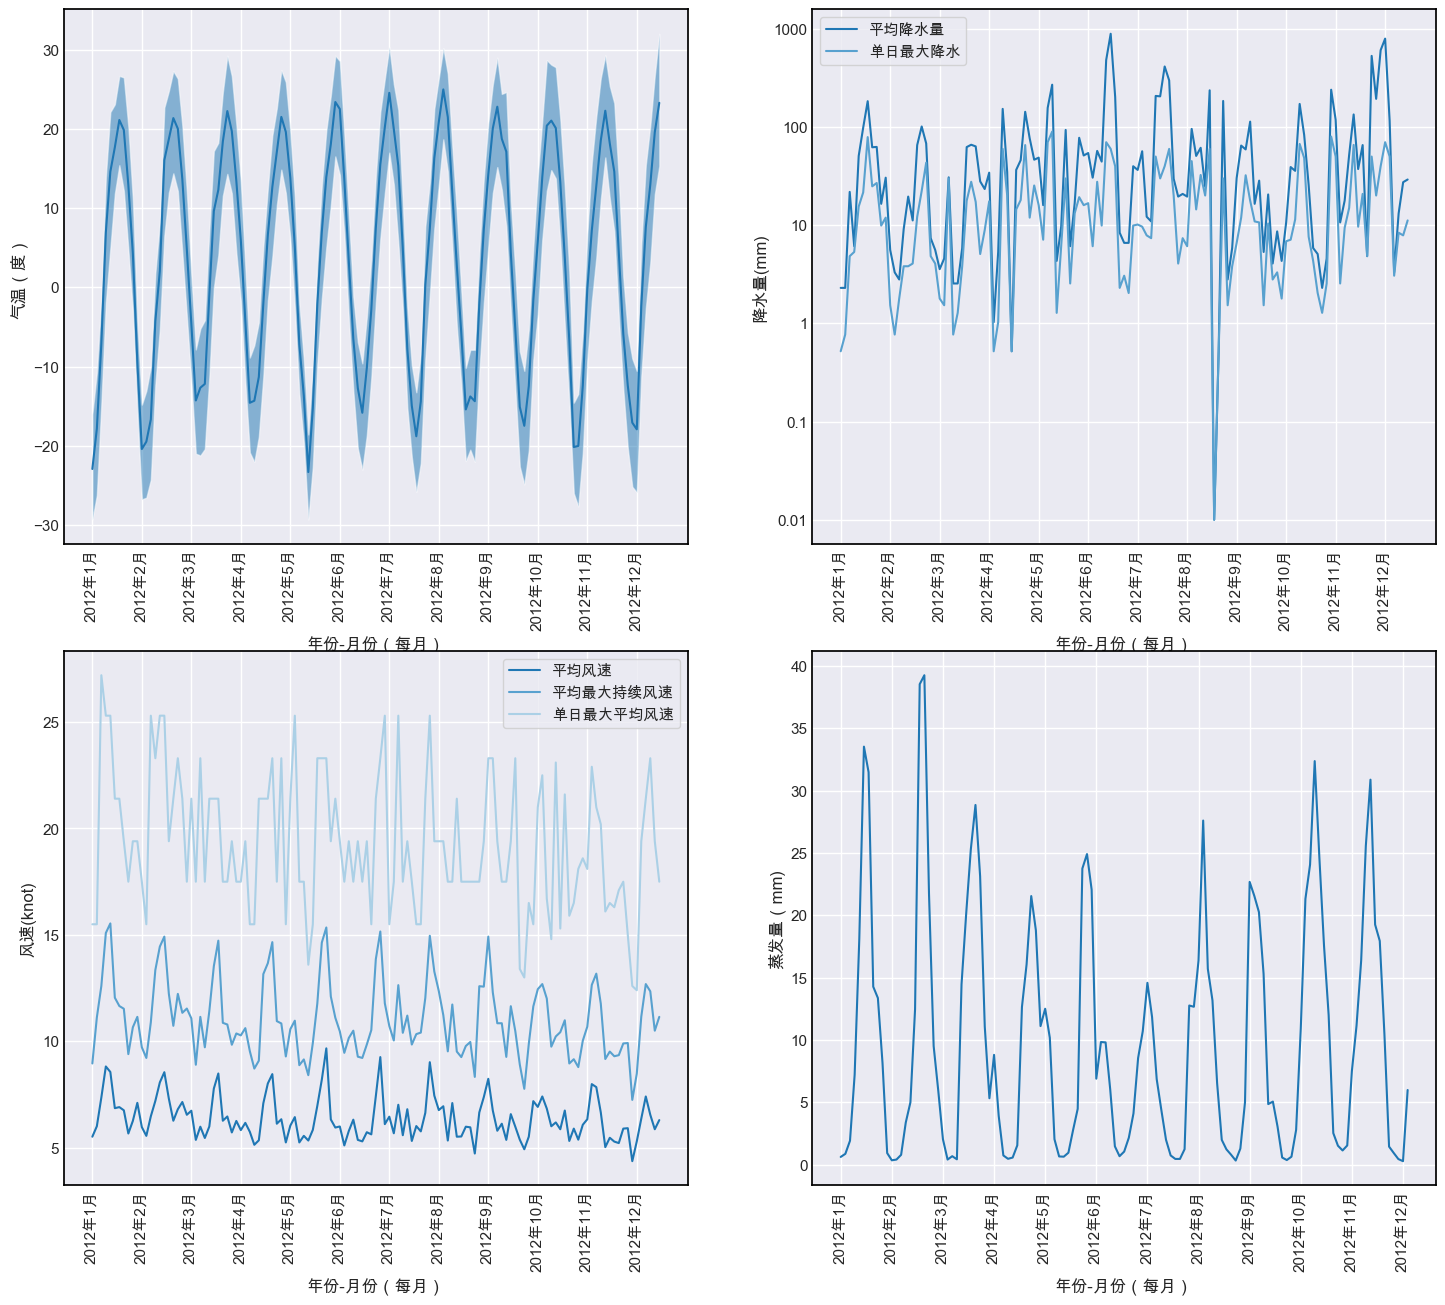

In [2]:
length=len(weather.iloc[:,5])
tempticks=[str(2012+i)+'年'+str(j)+'月' for j in range(1,13) for i in range(11)]
tempXticks=list(range(0,len(weather.iloc[:,5]),11))
tempticks=tempticks[:length:11]


plt.figure(figsize=(14,12))

plt.subplot(2,2,1)
plt.fill_between(list(range(length)),weather.iloc[:,6],weather.iloc[:,7],alpha=0.5)
plt.plot(list(range(length)),weather.iloc[:,5])
plt.xticks(tempXticks,tempticks,rotation='vertical')
plt.ylabel('气温（度）')
plt.xlabel('年份-月份（每月）')

plt.subplot(2,2,2)
plt.plot(list(range(length)),list(math.log(abs(i+0.01),10) for i in weather.iloc[:,14]))
plt.plot(list(range(length)),list(math.log(i+0.01,10) for i in weather.iloc[:,15]))
plt.xticks(tempXticks,tempticks,rotation='vertical')
plt.yticks(list(range(-2,4,1)),['0.01','0.1','1','10','100','1000'])
plt.ylabel('降水量(mm)')
plt.legend(['平均降水量','单日最大降水'])
plt.xlabel('年份-月份（每月）')

plt.subplot(2,2,3)
plt.plot(list(range(length)),weather.iloc[:,-5])
plt.plot(list(range(length)),weather.iloc[:,-4])
plt.plot(list(range(length)),weather.iloc[:,-3])
plt.xticks(tempXticks,tempticks,rotation='vertical')
plt.ylabel('风速(knot)')
plt.legend(['平均风速','平均最大持续风速','单日最大平均风速'])
plt.xlabel('年份-月份（每月）')

plt.subplot(2,2,4)
plt.plot(list(range(len(zhengfa.iloc[:,-1]))),zhengfa.iloc[:,-1])
plt.xticks(tempXticks,tempticks,rotation='vertical')
plt.ylabel('蒸发量（mm)')
plt.xlabel('年份-月份（每月）')



## 气象因素的互相关量

In [6]:
weather.iloc[:123,5].corr(zhengfa.iloc[:,-1],method="pearson")

0.8119251266596541

In [7]:
weather.iloc[:123,5].corr(zhibei.iloc[:,-1],method="pearson")

0.7828840640787904

In [8]:
weather.iloc[:123,14].corr(zhengfa.iloc[:,-1])

-0.13217258888691139

In [10]:
wendu=weather.iloc[:123,5]
jiangshui=weather.iloc[:123,14]
fengsu=weather.iloc[:123,-5]
zhengfa=zhengfa.iloc[:123,-1]
zhibei=zhibei.iloc[:123,-1]
data=pd.DataFrame({'wendu':wendu,'jiangshui':jiangshui,'fengsu':fengsu,'zhengfa':zhengfa,'zhibei':zhibei})

In [109]:
data.corr()

,wendu,jiangshui,fengsu,zhengfa,zhibei
wendu,1.000000,-0.256784,0.371897,0.811925,0.782884
jiangshui,-0.256784,1.000000,-0.300914,-0.132173,-0.173932
fengsu,0.371897,-0.300914,1.000000,0.314582,0.047393
zhengfa,0.811925,-0.132173,0.314582,1.000000,0.690009
zhibei,0.782884,-0.173932,0.047393,0.690009,1.000000


## 生物因素的处理

In [127]:
shengwut.columns

Index(['年份', '轮次', '处理', '日期', '植物种名', '植物群落功能群', '放牧小区Block', '重复', '营养苗',
       '生殖苗', '株/丛数', '丛幅1', '丛幅2', '鲜重(g)', '干重(g)',
       '备注：1、本表中放牧小区与附件14中放牧小区同义。'],
      dtype='object')

Text(0, 0.5, '牧畜数量（万头）')

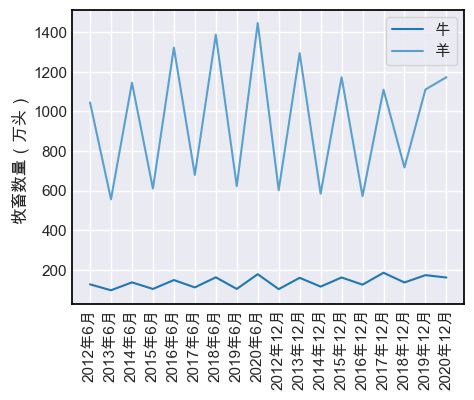

In [3]:
plt.figure(figsize=(4,3))
peoplelen=len(people)
peopletick=[str(2012+i)+'年'+str(j)+'月' for j in [6,12] for i in range(9)]
cattle=[]
sheep=[]
for i in range(peoplelen):
    cattle.append(people.iloc[i,2])
    sheep.append(people.iloc[i,3])
    cattle.append(people.iloc[i,4])
    sheep.append(people.iloc[i,5])
plt.plot(list(range(2*peoplelen)),cattle)
plt.plot(list(range(2*peoplelen)),sheep)
plt.legend(['牛','羊'])
plt.xticks(list(range(2*peoplelen)),peopletick,rotation='vertical')
plt.ylabel('牧畜数量（万头）')

## 地表因素

In [4]:
shengwut=pd.read_excel('shengwu.xlsx',sheet_name='2016-2020物种数据库',dtype={'干重(g)':float})
shengwut.columns

Index(['年份', '轮次', '处理', '日期', '植物种名', '植物群落功能群', '放牧小区Block', '重复', '营养苗',
       '生殖苗', '株/丛数', '丛幅1', '丛幅2', '鲜重(g)', '干重(g)',
       '备注：1、本表中放牧小区与附件14中放牧小区同义。'],
      dtype='object')

In [5]:
# 根据这四个可以唯一确定一个值
Ss=np.unique(shengwut.iloc[:,2])
year=np.unique(shengwut.iloc[:,0])
block=np.unique(shengwut.iloc[:,6])
rounds=np.unique(shengwut.iloc[:,1])

In [6]:
dataset=pd.DataFrame(columns=['S','year','plot','rounds','num','weight1','weight2'])
for s in Ss:
    # 不同的放牧策略
    for y in year:
        # 不同的时间点
        for b in block:
            for r in rounds:
                temp=shengwut[(shengwut.iloc[:,2]==s) & (shengwut.iloc[:,0]==y) & (shengwut.iloc[:,6]==b) & (shengwut.iloc[:,1]==r)]
                if len(temp)!=0:              
                    temp_num=sum(temp['株/丛数'])
                    tempw_1=sum(temp['鲜重(g)'])
                    tempw_2=sum(temp['干重(g)'])
                    dataset.loc[len(dataset.index)]=[s,y,b,r,temp_num,tempw_1,tempw_2]

Text(0, 0.5, '干重(g)')

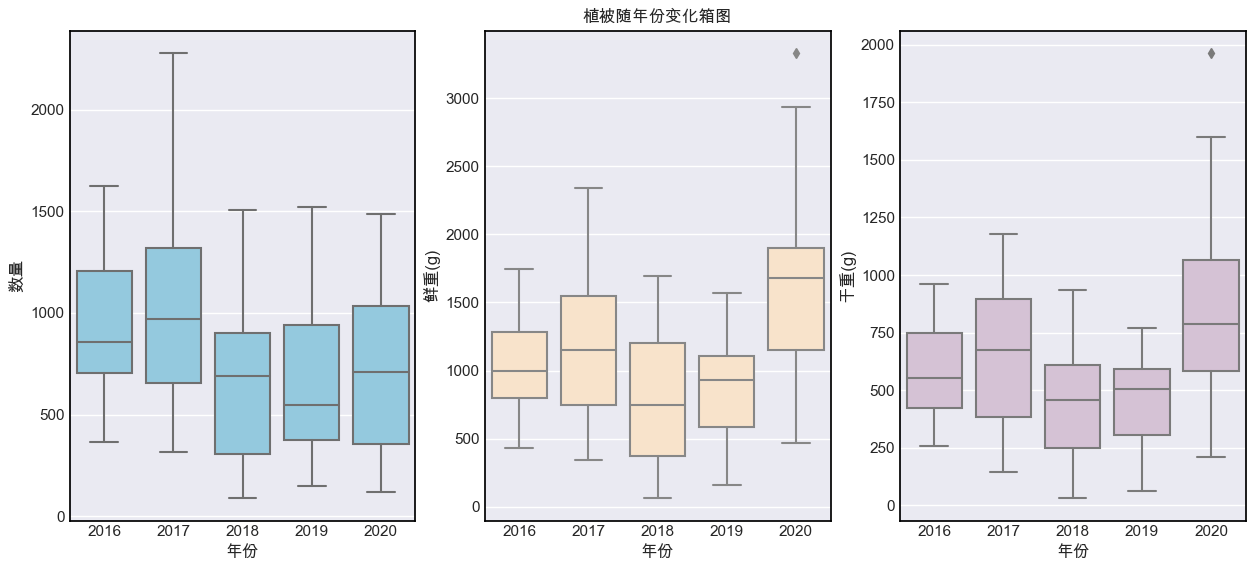

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.boxplot(x=dataset['year'],y=dataset['num'],color="skyblue")
plt.xlabel('年份')
plt.ylabel('数量')
plt.subplot(1,3,2)
sns.boxplot(x=dataset['year'],y=dataset['weight1'],color="bisque")
plt.title('植被随年份变化箱图')
plt.xlabel('年份')
plt.ylabel('鲜重(g)')
plt.subplot(1,3,3)
sns.boxplot(x=dataset['year'],y=dataset['weight2'],color="thistle")
plt.xlabel('年份')
plt.ylabel('干重(g)')



In [83]:
dataset.to_csv('dataset.csv',encoding='utf-8')

In [8]:
dataset['tem']=0
dataset['rain']=0
dataset['wind']=0
dataset['eva']=0
dataset['nvdi']=0
dataset['temstd']=0
dataset['rainstd']=0
dataset['windstd']=0
dataset['evastd']=0
dataset['nvdistd']=0
dataset['people']=0
dataset['cattle6']=0
dataset['sheep6']=0
dataset['cattle12']=0
dataset['sheep12']=0
dataset['income']=0
for y in year:
    dataset.loc[dataset['year']==y,'tem']=np.mean(weather[weather.iloc[:,0]==y].iloc[:,5])
    dataset.loc[dataset['year']==y,'rain']=np.mean(weather[weather.iloc[:,0]==y].iloc[:,14])
    dataset.loc[dataset['year']==y,'wind']=np.mean(weather[weather.iloc[:,0]==y].iloc[:,-5])
    dataset.loc[dataset['year']==y,'eva']=np.mean(zhengfa[zhengfa.iloc[:,0]==y].iloc[:,5])
    dataset.loc[dataset['year']==y,'nvdi']=np.mean(zhibei[zhibei.iloc[:,0]==y].iloc[:,-1])
    dataset.loc[dataset['year']==y,'temstd']=np.std(weather[weather.iloc[:,0]==y].iloc[:,5])
    dataset.loc[dataset['year']==y,'rainstd']=np.std(weather[weather.iloc[:,0]==y].iloc[:,14])
    dataset.loc[dataset['year']==y,'windstd']=np.std(weather[weather.iloc[:,0]==y].iloc[:,-5])
    dataset.loc[dataset['year']==y,'evastd']=np.std(zhengfa[zhengfa.iloc[:,0]==y].iloc[:,5])
    dataset.loc[dataset['year']==y,'nvdistd']=np.std(zhibei[zhibei.iloc[:,0]==y].iloc[:,-1])
    dataset.loc[dataset['year']==y,'people']=people[people.iloc[:,0]==y].iloc[0,1]
    dataset.loc[dataset['year']==y,'cattle6']=people[people.iloc[:,0]==y].iloc[0,2]
    dataset.loc[dataset['year']==y,'sheep6']=people[people.iloc[:,0]==y].iloc[0,3]
    dataset.loc[dataset['year']==y,'cattle12']=people[people.iloc[:,0]==y].iloc[0,4]
    dataset.loc[dataset['year']==y,'sheep12']=people[people.iloc[:,0]==y].iloc[0,5]
    dataset.loc[dataset['year']==y,'income']=people[people.iloc[:,0]==y].iloc[0,6]

## 整理后的dataset（训练数据集）

In [2]:
dataset=pd.read_excel('dataset.xlsx')

In [3]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X=X.iloc[:,3:]
X = (X - X.min()) / (X.max() - X.min())

<AxesSubplot: >

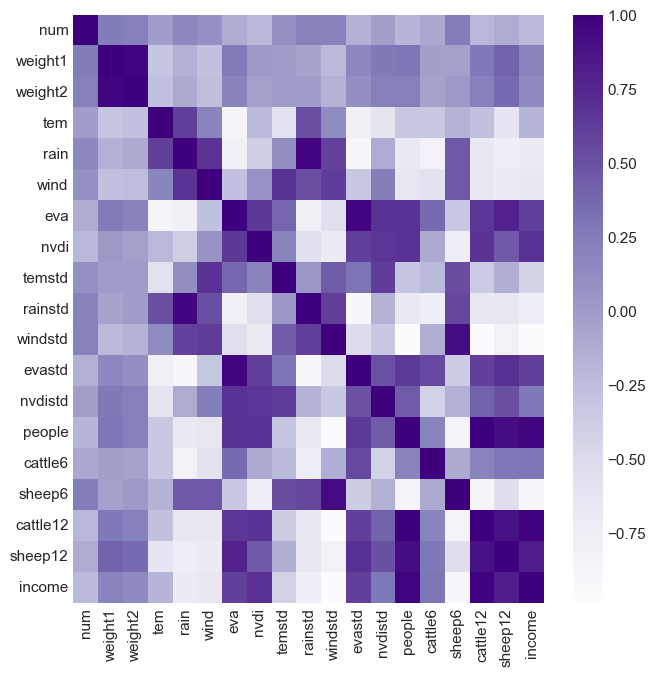

In [53]:
plt.figure(figsize=(6,6))
sns.heatmap(X.corr(),cmap="Purples")

In [12]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier    #导入需要的模块
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import HistGradientBoostingClassifier

# model = GradientBoostingClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# model = GradientBoostingRegressor()
# n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# define dataset


### model1 - light GBM调整参数

In [80]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
model = LGBMClassifier()
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':4,
    'learning_rate': 0.1,
    'metric':'softmax',
    'num_leaves': 50, 
    'max_depth': 6,
    'subsample': 0.8, 
    'colsample_bytree': 0.8, 
}
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))



#### 决策树参数调整

In [81]:
data_train = lgb.Dataset(X, y, silent=True)
cv_results = lgb.cv(
    lgb_params, data_train, num_boost_round=1000, nfold=5, stratified=False, shuffle=True, metrics='softmax',
    early_stopping_rounds=50, verbose_eval=50, show_stdv=True, seed=0)
print('best n_estimators:', len(cv_results['multi_logloss-mean']))
print('best cv score:', cv_results['multi_logloss-mean'][-1])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 19
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 19
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 19
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wis

In [105]:
from sklearn.model_selection import GridSearchCV
### 我们可以创建lgb的sklearn模型，使用上面选择的(学习率，评估器数目)
model = LGBMClassifier(objective= 'multiclass',
                       num_class=4,
                       learning_rate=0.1,
                       metric='softmax',
                       n_estimators=5,
                       max_depth=6,
                       subsample=0.8, 
                       colsample_bytree=0.8)

params_test1={
    'max_depth': range(2,30,1),
    'num_leaves':range(2,170, 3)
}
gsearch1 = GridSearchCV(estimator=model, param_grid=params_test1, scoring='f1_weighted', cv=5, verbose=1, n_jobs=4)

In [106]:
gsearch1.fit(X,y)
gsearch1.best_params_, gsearch1.best_score_
# 取max_depth=10,num_leaves=50

Fitting 5 folds for each of 1568 candidates, totalling 7840 fits


({'max_depth': 2, 'num_leaves': 5}, 0.33992829703945365)

### 降低过拟合

In [109]:
params_test3={
    'min_child_samples': [18, 19, 20, 21, 22],
    'min_child_weight':[0.001, 0.002]
}
model_lgb = lgb.LGBMClassifier(objective='softmax',num_leaves=50, num_class=4,
                              learning_rate=0.1, n_estimators=35, max_depth=7, 
                              metric='softmax', bagging_fraction = 0.8, feature_fraction = 0.8)
gsearch3 = GridSearchCV(estimator=model_lgb, param_grid=params_test3, scoring='f1_weighted', cv=5, verbose=1, n_jobs=4)
gsearch3.fit(X,y)
gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current val

({'min_child_samples': 21, 'min_child_weight': 0.001}, 0.3664834957351741)

### 正则化项目参数调节

In [110]:
model_lgb = lgb.LGBMClassifier(objective='softmax',num_leaves=50, num_class=4,
                              learning_rate=0.1, n_estimators=35, max_depth=7, 
                              metric='softmax',min_child_samples=1,min_child_weight=0.001)
params_test4={
    'feature_fraction': [0.5, 0.6, 0.7, 0.8, 0.9],
    'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 1.0]
}
gsearch4 = GridSearchCV(estimator=model_lgb, param_grid=params_test4, scoring='f1_weighted', cv=5, verbose=1, n_jobs=4)
gsearch4.fit(X,y)
gsearch4.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current va

({'bagging_fraction': 0.6, 'feature_fraction': 0.9}, 0.3664834957351741)

In [112]:
params_test5={
    'bagging_fraction': [0.82, 0.84, 0.86, 0.88, 0.90, 0.92, 0.94 ]
}
model_lgb = lgb.LGBMClassifier(objective='softmax',num_leaves=50, num_class=4,
                              learning_rate=0.1, n_estimators=35, max_depth=7, 
                              metric='softmax',min_child_samples=1,min_child_weight=0.001,feature_fraction=0.6)
gsearch5 = GridSearchCV(estimator=model_lgb, param_grid=params_test5, scoring='f1_weighted', cv=10, verbose=1, n_jobs=4)
gsearch5.fit(X,y)
gsearch5.best_params_, gsearch3.best_score_

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[LightGBM] [Warning] bagging_fraction is set=0.82, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.82, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.82, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.82, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Cur

({'bagging_fraction': 0.82}, 0.3664834957351741)

In [113]:
model_lgb = lgb.LGBMClassifier(objective='softmax',num_leaves=50, num_class=4,
                              learning_rate=0.1, n_estimators=35, max_depth=7, 
                              metric='softmax',min_child_samples=1,min_child_weight=0.001,feature_fraction=0.6,bagging_fraction=0.82)
params_test6={
    'reg_alpha': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5],
    'reg_lambda': [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]
}
gsearch6 = GridSearchCV(estimator=model_lgb, param_grid=params_test6, scoring='f1_weighted', cv=10, verbose=1, n_jobs=4)
gsearch6.fit(X,y)
gsearch6.best_params_, gsearch3.best_score_

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[LightGBM] [Warning] bagging_fraction is set=0.82, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.82, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.82, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.82, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. C

({'reg_alpha': 0.03, 'reg_lambda': 0.001}, 0.3664834957351741)

#### 使用lightGBM自带的参数

In [126]:
import lightgbm as lgb
lgb_params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class':4,
    'learning_rate': 0.01,
    'metric':'softmax',
    'num_leaves': 50, 
    'max_depth': 7,
    'min_child_samples':1,
    'min_child_weight':0.001,
    'feature_fractio':0.6,
    'bagging_fraction':0.82,
    'n_estimators':35,
    'reg_alpha': 0.03,
    'reg_lambda': 0.001
}
model_lgb = lgb.LGBMClassifier(objective='softmax',num_leaves=50, num_class=4,
                              learning_rate=0.1, n_estimators=35, max_depth=7, 
                              metric='softmax',min_child_samples=1,min_child_weight=0.001,
                              feature_fraction=0.6,bagging_fraction=0.82,reg_alpha=0.03,reg_lambda=0.001)
data_train = lgb.Dataset(X, y, silent=True,feature_name=X.columns.tolist())
cv_results = lgb.cv(
    lgb_params, data_train, num_boost_round=10000, nfold=5, stratified=False, shuffle=True,
    early_stopping_rounds=50, verbose_eval=100, show_stdv=True)


/Users/chenxia/miniforge3/envs/datastudy/lib/python3.9/site-packages/lightgbm/engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/chenxia/miniforge3/envs/datastudy/lib/python3.9/site-packages/lightgbm/engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/chenxia/miniforge3/envs/datastudy/lib/python3.9/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/chenxia/minif

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 19
[LightGBM] [Warning] Unknown parameter: feature_fractio
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 19
[LightGBM] [Warning] Unknown parameter: feature_fractio
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 19
[LightGBM] [Warning] 

In [120]:
len(cv_results['multi_logloss-mean'])

35

[LightGBM] [Warning] bagging_fraction is set=0.82, subsample=1.0 will be ignored. Current value: bagging_fraction=0.82
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6


<Figure size 1200x600 with 0 Axes>

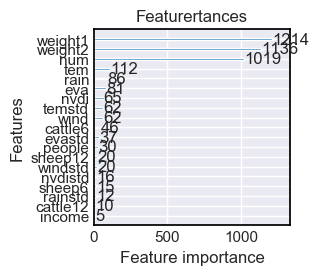

In [5]:
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier(objective='softmax',num_leaves=50, num_class=4,
                              learning_rate=0.1, n_estimators=35, max_depth=7, 
                              metric='softmax',min_child_samples=1,min_child_weight=0.001,
                              feature_fraction=0.6,bagging_fraction=0.82,reg_alpha=0.03,reg_lambda=0.001)
model_lgb.fit(X,y)
plt.figure(figsize=(12,6))
lgb.plot_importance(model_lgb)
plt.title("Featurertances")
plt.show()

booster = model_lgb.booster_
importance_lgb = booster.feature_importance(importance_type='split')

In [6]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X, y)
importances = forest.feature_importances_

([<matplotlib.axis.XTick at 0x179c83610>,
 [Text(0, 0, 'num'),
  Text(1, 0, 'weight1'),
  Text(2, 0, 'weight2'),
  Text(3, 0, 'tem'),
  Text(4, 0, 'rain'),
  Text(5, 0, 'wind'),
  Text(6, 0, 'eva'),
  Text(7, 0, 'nvdi'),
  Text(8, 0, 'temstd'),
  Text(9, 0, 'rainstd'),
  Text(10, 0, 'windstd'),
  Text(11, 0, 'evastd'),
  Text(12, 0, 'nvdistd'),
  Text(13, 0, 'people'),
  Text(14, 0, 'cattle6'),
  Text(15, 0, 'sheep6'),
  Text(16, 0, 'cattle12'),
  Text(17, 0, 'sheep12'),
  Text(18, 0, 'income')])

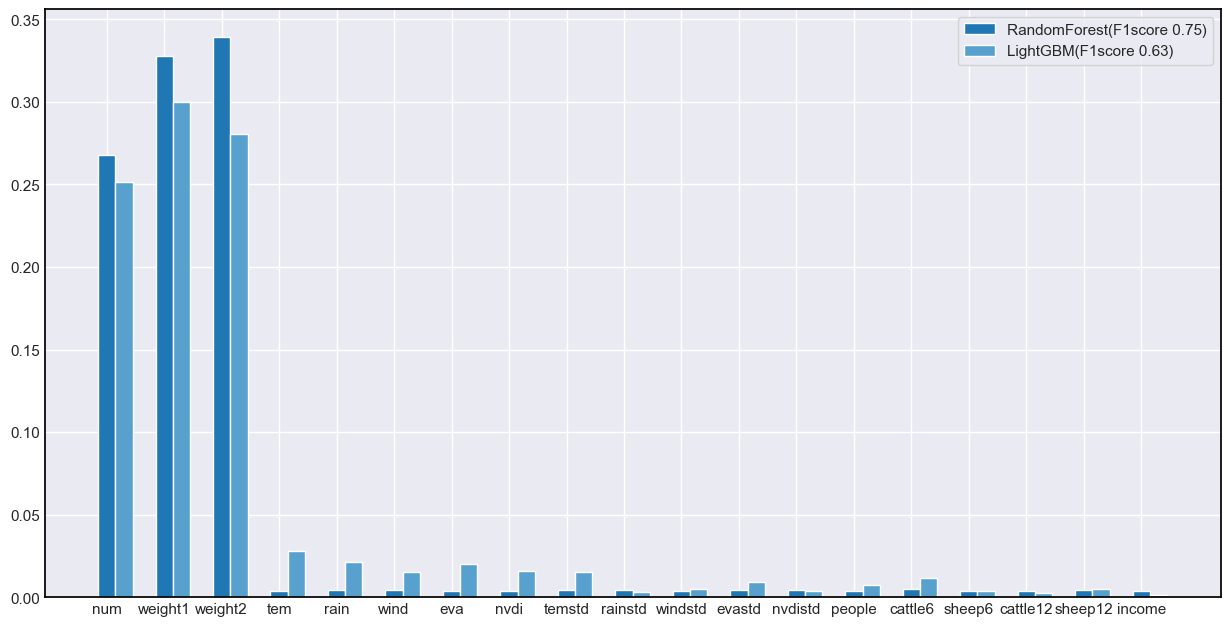

In [7]:
plt.figure(figsize=(12,6))
plt.bar(list(range(len(importances))),importances,width=0.3)
plt.bar(list(i+0.3 for i in range(len(importances))),list(j/sum(importance_lgb) for j in importance_lgb),width=0.3)
plt.legend(['RandomForest(F1score 0.75)','LightGBM(F1score 0.63)'])
plt.xticks(list(range(len(importances))),X.columns.tolist())

In [14]:
q1=list(j/sum(importance_lgb) for j in importance_lgb)
q2=importances
import math
q=[math.sqrt(0.63*pow(q1[i],2)+0.75*pow(q2[i],2)) for i in range(len(q1))]
q

[0.30609640137736716,
 0.3704024723003613,
 0.3686916211710668,
 0.022228449808779704,
 0.017275664752253582,
 0.01266789372548623,
 0.01622746006104087,
 0.013177802056265767,
 0.012680940664347676,
 0.004362596451937411,
 0.005169070935139491,
 0.008103867773023216,
 0.004822274143497464,
 0.0067441621179109125,
 0.010036025866224063,
 0.0044660525076380625,
 0.0038063592728680502,
 0.005283468460891799,
 0.003469309647570716]

In [15]:
X.columns

Index(['num', 'weight1', 'weight2', 'tem', 'rain', 'wind', 'eva', 'nvdi',
       'temstd', 'rainstd', 'windstd', 'evastd', 'nvdistd', 'people',
       'cattle6', 'sheep6', 'cattle12', 'sheep12', 'income'],
      dtype='object')

### 计算权重修正系数\eta

In [28]:
1-sum(q*X.mean())


0.6111081416881785

In [30]:
0.42/0.61

0.6885245901639344

In [31]:
for i in range(4):
    temp=X.loc[y==i,:]
    print(0.688*(1-sum(q*temp.mean())))

0.40807865438964014
0.38536663881998234
0.42983146703941616
0.45913392013295373


75